<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampDataEngineering/blob/master/ExplorDataAnalysisPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCExploratoryDataAnalysis/")
os.getcwd()

'/content/gdrive/My Drive/DCExploratoryDataAnalysis'

# Read, Clean, and Validate
### Dataframes and Series

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Looking at birth data

df = pd.read_hdf('nsfgBirthData.hdf5')
df.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [0]:
df.shape

(9358, 10)

In [0]:
df.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [0]:
ounces = df.birthwgt_oz1

In [0]:
ounces[:5]

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

### Clean and Validate

In [0]:
pounds = df.birthwgt_lb1

In [0]:
# Confirm we're interpreting the data correctly: value_counts, compare with code book
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [0]:
# describe 
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [0]:
pounds = pounds.replace([98,99], np.nan) # assigning to new variable means 

In [0]:
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [0]:
ounces = ounces.replace([98,99], np.nan)

In [0]:
total_birthweight = pounds + ounces/16
total_birthweight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

### Filter and Visualize

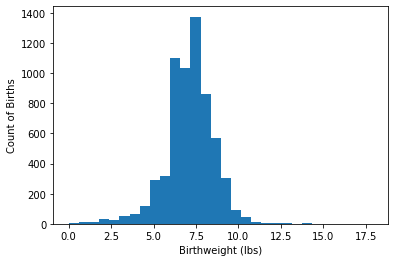

In [0]:
import matplotlib.pyplot as plt
plt.hist(total_birthweight.dropna(),bins=30)
plt.xlabel('Birthweight (lbs)')
plt.ylabel('Count of Births')
plt.show()

In [0]:
preterm = df['prglngth'] < 37
preterm

0       False
1        True
2        True
3        True
4       False
        ...  
9353     True
9354    False
9355     True
9356    False
9357    False
Name: prglngth, Length: 9358, dtype: bool

In [0]:
preterm.sum()

3742

In [0]:
preterm.mean()

0.39987176747168196

In [0]:
preterm_weight = total_birthweight[preterm]
preterm_weight.head()

1    4.75
2    5.25
3     NaN
5     NaN
6    5.00
dtype: float64

In [0]:
preterm_weight.mean()

5.577598314606742

In [0]:
fullterm_weight = total_birthweight[~preterm] # ~ 'not' preterm
fullterm_weight.mean()

7.372323879231473

In [0]:
# & and |: logical and or logical or

Resampling: <br>
Some groups in the data are oversampled to make sure that enough people are in each subgroup to get good statistics.  Resampling corrects this.  Loaded console function.

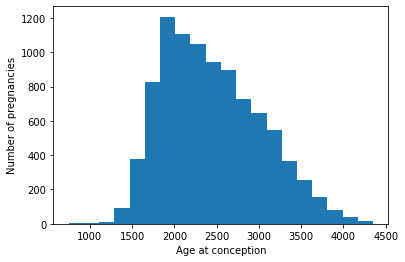

In [0]:
# Plot the histogram
plt.hist(df.agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

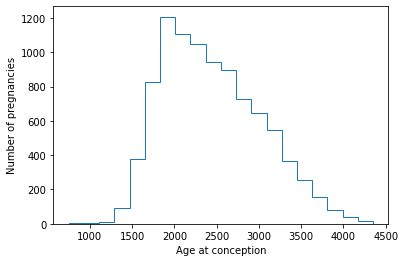

In [0]:
# Plot the histogram
plt.hist(df.agecon, bins=20,histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [0]:

# Create a Boolean Series for full-term babies
full_term = df.prglngth >= 37

# Select the weights of full-term babies
full_term_weight = total_birthweight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


In [0]:

# Filter full-term babies
full_term = df['prglngth'] >= 37

# Filter single births
single = df['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = total_birthweight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = total_birthweight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


# Distributions
### Probability Mass Functions
PMF's contains unique values in dataset and how often each appears. i.e a function that creates a countplot so that each discrete value can be separated into counts. Can be separated into probabilities also- the probability of getting the value x.

In [0]:
df = pd.read_hdf('GeneralSocialSurvey.hdf5')
df.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


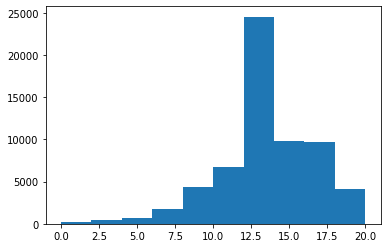

In [0]:
edu = df['educ']
plt.hist(edu.dropna(), label='education')
plt.show()

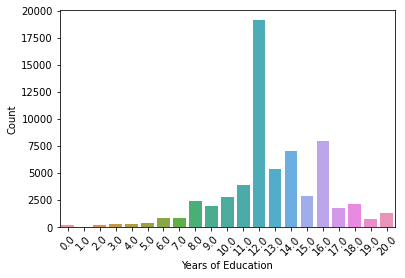

In [0]:
import seaborn as sns

sns.countplot(x=edu, data = df) # or sns.catplot(kind='count')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Cumulative Distribution Functions
Shows the probability of getting a value <= x. Can't show in notebook because it is a loaded console function.<br>
Logarithmic function.

### Comparing Distributions
Comparing multiple PMF's or CDF's on the same axes <br>
CDF's provide a clearer picture when PMF's are messy, good for 2 and more distribution<br>

In [0]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

### Modeling Distributions
scipy.norm
KDE plot is a way ato get from a PMF to a PDF, Probability Density Function<br>
us sns.kdeplot() (Kernel Density Estimate) to get a good look at distribution of cdf's.

In [0]:
from scipy.stats import norm
import seaborn as sns

In [0]:
# Extract realinc and compute its log
income = df['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
dist = norm(mean)

4.371148677933652 0.4290082383271419


NameError: ignored

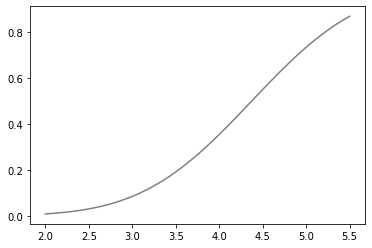

In [0]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

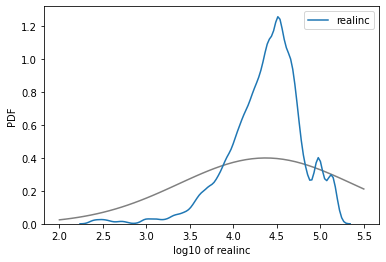

In [0]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# Relationships
### Exploring Relationships
Jittering separates many rounded data points so that they are easier to see.  Don't be lazy with scatterplots.  Refine them so that they convey a clear meaning.

In [7]:
import matplotlib.pyplot as plt
df = pd.read_hdf('BehavioralRiskFactor.hdf5')
df.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [8]:
df.shape

(100000, 9)

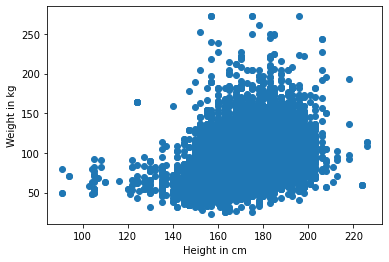

In [11]:
height = df['HTM4']
weight = df['WTKG3']
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.plot(height, weight, 'o')

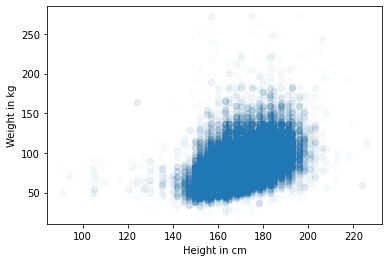

In [12]:
height = df['HTM4']
weight = df['WTKG3']
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.plot(height, weight, 'o', alpha=0.02)

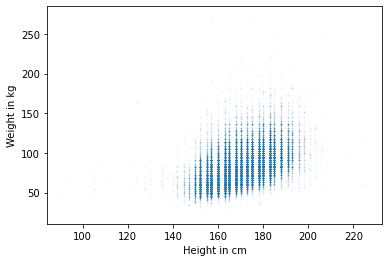

In [13]:
height = df['HTM4']
weight = df['WTKG3']
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)

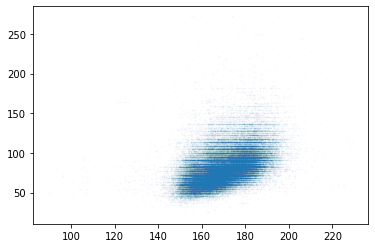

In [15]:
#Jittering
height_jitter = height + np.random.normal(0, 2, size=len(df))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.show()


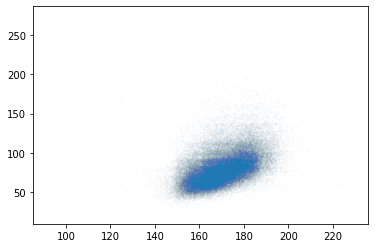

In [16]:
#More jittering
height_jitter = height + np.random.normal(0, 2, size=len(df))
weight_jitter = weight + np.random.normal(0, 2, size=len(df))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.show()

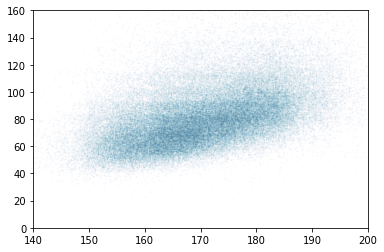

In [18]:
#Zoom
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


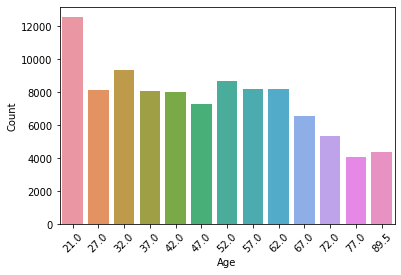

In [20]:
# Create 
import seaborn as sns
sns.countplot(x=df.AGE, data = df) # or sns.catplot(kind='count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

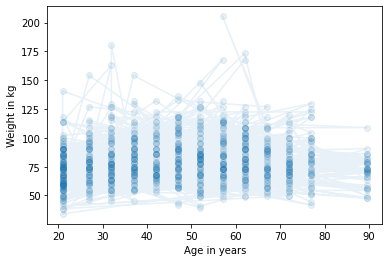

In [22]:

# Select the first 1000 respondents
df = df[:1000]

# Extract age and weight
age =df['AGE']
weight = df['WTKG3']

# Make a scatter plot

plt.plot(age, weight, marker = 'o', alpha=0.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

### Visualizing Relationships
boxplots and violin plots

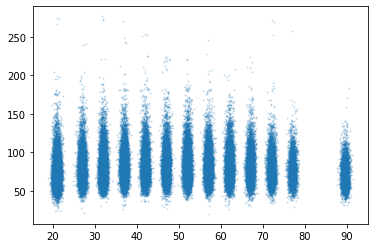

In [23]:
# Plotting a distribution scatterplot for more than one input
df = pd.read_hdf('BehavioralRiskFactor.hdf5')
age = df['AGE'] + np.random.normal(0, 0.5, size=len(df))
weight = df['WTKG3'] + np.random.normal(0, 2, size=len(df))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.show()

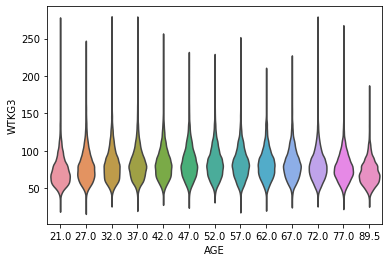

In [24]:
#Violin plot
data = df.dropna(subset=['AGE', 'WTKG3'])

sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

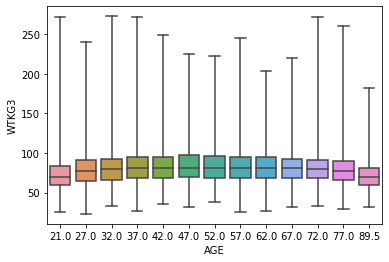

In [25]:
#Box plot
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

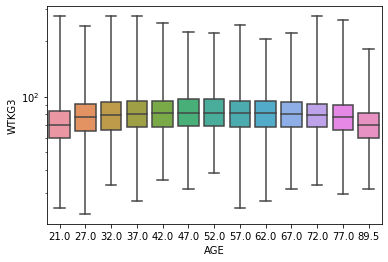

In [27]:
#Log scale for when data is skewed toward higher values
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

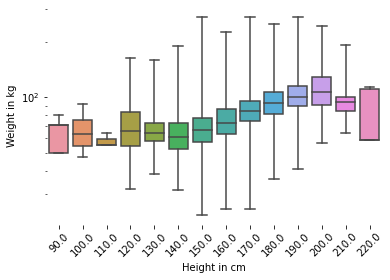

In [32]:
# Drop rows with missing data
data = df.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(df['_HTMG10'],df['WTKG3'], whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.xticks(rotation=45)
plt.show()


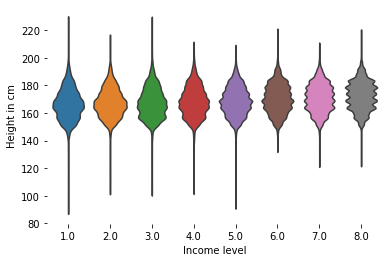

In [34]:
# Drop rows with missing data
data = df.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2',y='HTM4',data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

### Correlation: Correlation
Usually Pearson's Corre Coeff-r -1<=r<=1 <br>
If correlation is low, check for nonlinear relationship.<br>
Slope is more important than correlation. <br>

In [35]:
#Correlation coefficient matrix
columns = ['HTM4', 'WTKG3', 'AGE']
subset = df[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [36]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = df[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


### Simple Regression
from scipy.stats import linregress: returns regression values <br>

In [0]:
from scipy.stats import linregress

In [40]:
#Regression line
subset = df.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9192115381848305, intercept=-75.12704250330248, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802998)


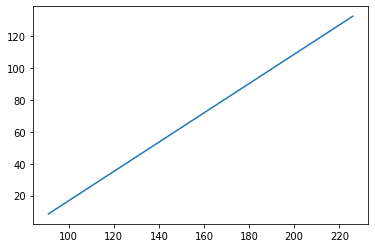

In [41]:

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.show()

In [43]:
#Nonlinear relationships
subset = df.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']

res = linregress(xs, ys)
res

LinregressResult(slope=0.023981159566968734, intercept=80.07977583683224, rvalue=0.02164143288906408, pvalue=4.374327493007456e-11, stderr=0.003638139410742185)

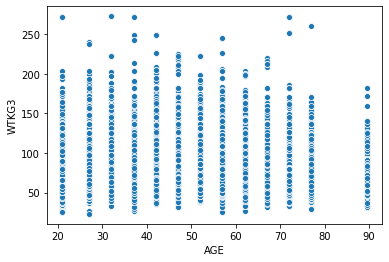

In [50]:
sns.scatterplot(df['AGE'],df['WTKG3'])
plt.show()

# Multivariate Thinking
### Limits of Simple Regression
Sometimes switchign the x and y yields insights. i.e. there was no correlation between income influencing vegetable consumption but there was in vegetable consumption influencing income. 

In [0]:
import statsmodels.formula.api as smf

In [53]:
#Multiple regression

results = smf.ols('INCOME2 ~ _VEGESU1', data=df).fit() # .ols stands for ordinary least squares
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [56]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = df.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = df).fit()
print(results.params) # The second value printed is the slope of the line

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


### Multiple Regression

In [57]:
# Load GSS data
df = pd.read_hdf('GeneralSocialSurvey.hdf5')
df.head(2)

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446


In [59]:
#Income and education

results = smf.ols('realinc ~ educ', data=df).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

In [60]:
# Adding age - It's assumed the the effect of multiple inputs is additive to output
results = smf.ols('realinc ~ educ + age', data=df).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

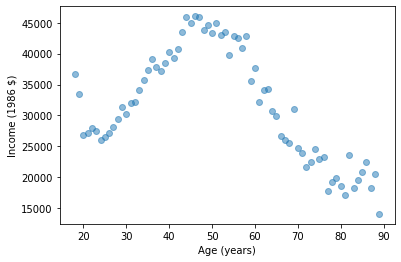

In [62]:
# Income and age - Zoomin on the effect of age and income
grouped = df.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [64]:
# Adding a quadratic term
df['age2'] = df['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=df)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

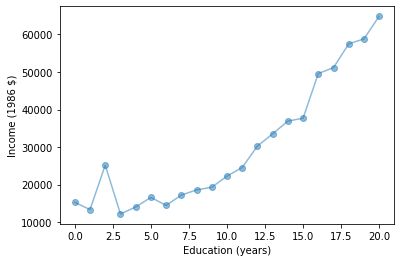

In [65]:
# Group by educ
grouped = df.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, marker='o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [66]:

import statsmodels.formula.api as smf

# Add a new column with educ squared
df['educ2'] = df['educ']**2

# Run a regression model with educ, educ2, age, and age2
 
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=df)
results = results.fit()
results.params
# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


# Visualizing Results
Using predict() to predict outcome

In [68]:
#Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)
pred12

0     18422.699989
1     19864.036105
2     21241.067963
3     22553.795565
4     23802.218909
5     24986.337997
6     26106.152827
7     27161.663401
8     28152.869717
9     29079.771777
10    29942.369580
11    30740.663126
12    31474.652414
13    32144.337446
14    32749.718221
15    33290.794739
16    33767.567000
17    34180.035004
18    34528.198751
19    34812.058241
20    35031.613474
21    35186.864451
22    35277.811170
23    35304.453632
24    35266.791837
25    35164.825786
26    34998.555477
27    34767.980911
28    34473.102089
29    34113.919009
30    33690.431673
31    33202.640080
32    32650.544229
33    32034.144122
34    31353.439758
35    30608.431136
36    29799.118258
37    28925.501123
38    27987.579731
39    26985.354082
40    25918.824176
41    24787.990013
42    23592.851593
43    22333.408916
44    21009.661982
45    19621.610791
46    18169.255343
47    16652.595638
48    15071.631677
49    13426.363458
dtype: float64

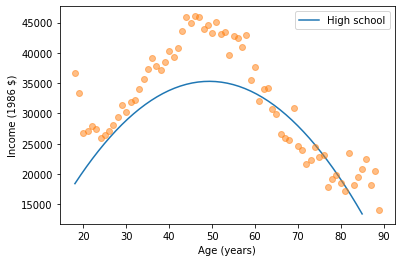

In [69]:
#Plotting predictions
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

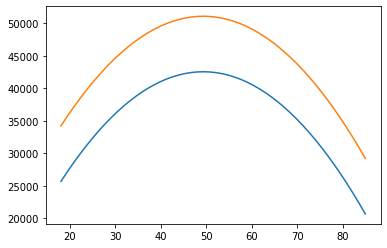

In [71]:
#Levels of education
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.show()

In [0]:
data = pd.read_hdf('GeneralSocialSurvey.hdf5')

In [110]:


# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=data).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

PatsyError: ignored

In [77]:

# Plot mean income in each age group
plt.clf()
grouped = data.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()


# Plot the predictions
pred = results.predict(df)
plt.plot(mean_income_by_educ, alpha=0.5, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

PatsyError: ignored

<Figure size 432x288 with 0 Axes>

### Logistic Regression

In [82]:
df = pd.read_hdf('GeneralSocialSurvey.hdf5')
df.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [83]:
# Add a new column with educ squared
#df['educ2'] = df['educ']**2
df['age2'] = df['age']**2
# Run a regression model with educ, educ2, age, and age2
 
# results = smf.ols('realinc ~ educ + educ2 + age + age2', data=df)
# results = results.fit()
# results.params
# # Print the estimated parameters
# print(results.params)


#Sex and income
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=data).fit()
results.params


PatsyError: ignored

In [84]:
df.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,676.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,3481.0


In [96]:
#Boolean variable
data = pd.read_hdf('GeneralSocialSurvey.hdf5')
data['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [97]:
# Recode so we can use logistic regression package/method
data['gunlaw'].replace([2], [0], inplace=True)
data['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [98]:
#Logistic regression
data['educ2'] = data['educ']**2
data['age2'] = data['age']**2
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


In [99]:
results.params

Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

In [0]:
#Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

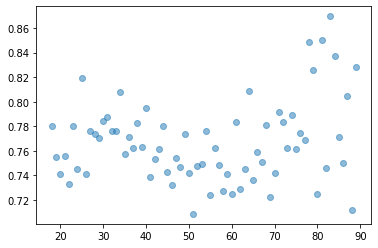

In [102]:
#Visualizing results
grouped = data.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.show()

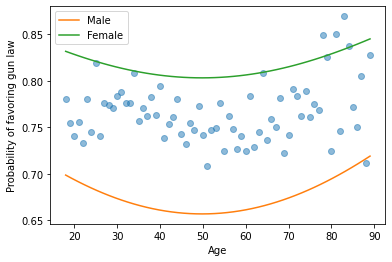

In [103]:
#Visualizing results
#grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()

In [104]:
# Recode grass
data['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=data).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [0]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

In [0]:
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

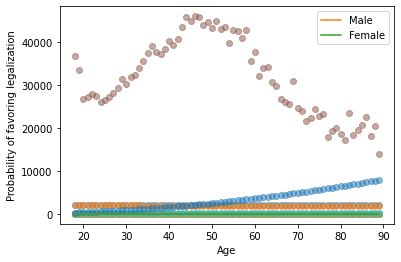

In [108]:
plt.clf()
grouped = data.groupby('age')
favor_by_age = grouped.mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred1, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()